# **HW 3: Data Clustering**
<hr>

<u>**Members**</u><br>
Tharnarch Thoranisttakul 63340500025<br>
Athimet Aiewcharoen 63340500068
<hr>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import pandas_profiling as pp
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Fetures selection
from sklearn.feature_selection import SelectKBest, f_classif, chi2,VarianceThreshold
from sklearn.decomposition import PCA

# Models
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, AffinityPropagation, Birch, MeanShift, OPTICS

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, StratifiedKFold, cross_val_score

# Resampling
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import InstanceHardnessThreshold, RandomUnderSampler, NearMiss

# Classification metrics
from sklearn.metrics import classification_report, confusion_matrix , silhouette_score , rand_score , adjusted_mutual_info_score, mutual_info_score

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# For Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist

# Gower distance
import gower

# Make image directory (img)
import os
currDir = os.getcwd()
if not os.path.exists('img'):
    os.mkdir('img')
if not os.path.exists('img/hierplot/numvsnum') or not os.path.exists('img/hierplot/catevscate') or not os.path.exists('img/hierplot/numvscate'):
    os.makedirs('img/hierplot/numvsnum')
    os.makedirs('img/hierplot/catevscate')
    os.makedirs('img/hierplot/numvscate')

# Set global random seed
np.random.seed(1)

In [2]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap([(0.235, 0.635, 0.827), (0.863, 0.863, 0.863)])
snsPalette = [(0.235, 0.635, 0.827), (0.475, 0.027, 0.082)]
bgColor = (0.059, 0.067, 0.102)
axBGColor = (0.863, 0.863, 0.863)
barColor = (0.235, 0.635, 0.827)
axTextColor = (0.9, 0.9, 0.9)
textColor = (0, 0, 0)
titleColor = (0.9, 0.9, 0.9)
plt.rcParams['figure.facecolor'] = bgColor
plt.rcParams['axes.facecolor'] = axBGColor
plt.rcParams['axes.edgecolor'] = axTextColor
plt.rcParams['axes.labelcolor'] = axTextColor
plt.rcParams['xtick.color'] = axTextColor
plt.rcParams['ytick.color'] = axTextColor
plt.rcParams['text.color'] = textColor
plt.rcParams['axes.titlecolor'] = titleColor
plt.rcParams['legend.labelcolor'] = titleColor

In [ ]:
def checkCorrFF(df, pathToImg = None):
    plt.figure(figsize=(20,10))
    cor = df.corr()
    sns.heatmap(cor, annot=True, cmap='inferno')
    if pathToImg != None:
        plt.savefig(pathToImg, bbox_inches='tight')
    plt.show()

## **Data Exploration**

From the description file, there are a total of 17 features in this dataset which are:

|Feature Name|Description|Data Type|
|:-:|-|:-:|
|<font color='green'>age</font>|Customer's age (in years)|<font color='red'>Numerical</font>|
|<font color='green'>job</font>|Types of Job|<font color='red'>Categorical</font>|
|<font color='green'>marital</font>|Marital Status|<font color='red'>Categorical</font>|
|<font color='green'>education</font>|Education|<font color='red'>Categorical</font>|
|<font color='green'>default</font>|Has credit in Default?|<font color='red'>Categorical</font>|
|<font color='green'>balance</font>|Average yearly balance|<font color='red'>Numerical</font>|
|<font color='green'>housing</font>|Has housing loan?|<font color='red'>Categorical</font>|
|<font color='green'>loan</font>|Has personal loan?|<font color='red'>Categorical</font>|
|<font color='green'>contact</font>|Contact Communication Type|<font color='red'>Categorical</font>|
|<font color='green'>day</font>|Last contact day of the month|<font color='red'>Numerical</font>|
|<font color='green'>month</font>|Last contact month of the year|<font color='red'>Categorical</font>|
|<font color='green'>duration</font>|Last contact duration (in seconds).<br><br> Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.|<font color='red'>Numerical</font>|
|<font color='green'>campaign</font>|no. of contacts performed during this campaign and for this client|<font color='red'>Numerical</font>|
|<font color='green'>pdays</font>|no. of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted)|<font color='red'>Numerical</font>|
|<font color='green'>previous</font>|no. of contacts performed before this campaign and for this client|<font color='red'>Numerical</font>|
|<font color='green'>poutcome</font>|outcome of the previous marketing campaign|<font color='red'>Categorical</font>|
|<font color='green'>y</font>|has the client subscribed a term deposit?|<font color='red'>Categorical</font> [Output]|

Number of instances: 45211 for bank-full.csv <br>
Number of Attributes: 16 + output attribute (17)<br>
(45211 rows, 17 columns)

Missing Attribute Values: None

### **Import Dataset**

In [1]:
dfOri = pd.read_csv('../HWdata/bank/bank-full.csv', sep=';')
df = dfOri.copy()

NameError: name 'pd' is not defined

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
print(f"No. of Instances: {df.shape[0]}\nNo. of Features: {df.shape[1]}")

### **Remove Unnecessary Features**

In [ ]:
if 'duration' in df.columns:
    df.drop('duration', axis=1, inplace=True)
    print(f"No. of Features Left: {df.shape[1]}")
else:
    print("\'Duration\' removed!")

### **Check and Remove Duplicates** 

In [ ]:
print(f"No. of Duplicates: {df.duplicated().sum()}")

In [ ]:
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print(f"No. of Instances Left: {df.shape[0]}")
else:
    print("No duplicates!")

In [ ]:
df.info()

### **Check and Remove Missing Values**

In [ ]:
if df.isna().sum().sum() > 0:
    df.dropna(inplace=True)
    print(f"No. of Instances Left: {df.shape[0]}")
else:
    print("No missing values!")

### **Replace Data in "pdays"**
The datasets stated that the value of -1 in "pdays" means that the client was not previously contacted. However, the value of -1 is not a valid value for "pdays" because it is a numerical value (day can't be negative). Therefore, we replace the value of -1 with 0.

In [ ]:
df['pdays'].value_counts()

In [ ]:
df['pdays'].replace(-1, 0, inplace=True)
df['pdays'].value_counts()

Since there are 16 duplicated instances and no missing values, we are left with 45195 instances.  
Furthermore, after dropping the unnecessary features, we are left with 16 features including output (y).

In which, there are:

- 10 features, including output, that are '<font color='green'>object</font>', which means that they are '<font color='red'>Categorical Features</font>'.
- 6 features that are '<font color='green'>int64</font>', which means that they are '<font color='red'>Numerical Features</font>'

### **Sort Features**
**Order:**
1. Numerical Features
2. Categorical Features
3. Output

**Separate Numerical Features from Dataset**

In [ ]:
dfNum = df.select_dtypes(include=['int64'])

**Separate Categorical Features from Dataset**

In [ ]:
dfCate = df.select_dtypes(include=['object'])
dfCate = dfCate.iloc[:,:-1]

**Separate Output from Dataset**

In [ ]:
dfOut = df.iloc[:,len(df.columns)-1:len(df.columns)]

**Concatenate Separated Data**

In [ ]:
df = pd.concat([dfNum, dfCate, dfOut], axis=1)
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

**Separate Yes and No from Output**

In [ ]:
dfYes = df[df['y'] == 1]
dfNo = df[df['y'] == 0]

In [ ]:
df.info()

### **Overall Report**

In [ ]:
dfProfile = df.copy()
dfProfile.reset_index(drop=True, inplace=True)
profile = pp.ProfileReport(dfProfile, title="Bank Full Report", dark_mode=True)
profile.config.html.style.primary_color = '#3CA2D3'
if not os.path.exists(os.path.join(currDir, 'HW3OverallReport.html')):
    profile.to_file('HW3OverallReport.html')
profile.to_notebook_iframe()

#### **Plot Features of Separated Output**

In [ ]:
OutDist, ax = plt.subplots(1, 1, figsize=(5,5))
df.groupby('y').size().plot(kind = 'pie',
                            y = "y",
                            autopct = '%1.1f%%',
                            ax = ax,
                            colormap = cmap)
ax.set_ylabel('Output')
OutDist.suptitle("Output Distribution", fontsize=16, color=titleColor)
OutDist.subplots_adjust(top=1.1)

In [ ]:
AllHists, axes = plt.subplots(3, 15, figsize=(80, 20))
for idx, col in enumerate(df.columns):
    if col != 'y':
        sns.histplot(ax = axes[0, idx],
                     data = df,
                     x = col,
                     kde = False,
                     color = barColor)
        axes[0, idx].set_title(col + " (Base)")
for idx, col in enumerate(dfNo.columns):
    if col != 'y':
        sns.histplot(ax = axes[1, idx],
                     data = dfNo,
                     x = col,
                     kde = False,
                     color = barColor)
        axes[1, idx].set_title(col + " (No)")
for idx, col in enumerate(dfYes.columns):
    if col != 'y':
        sns.histplot(ax = axes[2, idx],
                     data = df,
                     x = col,
                     kde = False,
                     color = barColor)
        axes[2, idx].set_title(col + " (Yes)")
AllHists.suptitle("Histograms of All Features",
                  fontsize = 36,
                  color = titleColor)
AllHists.subplots_adjust(top=0.92)

In [ ]:
NumHists, axes = plt.subplots(2, 3, figsize=(20, 10))
for idx, col in enumerate(dfNum.columns):
    if col != 'y' and idx < 3:
        sns.histplot(ax = axes[0, idx],
                     data = df,
                     x = col,
                     kde = False,
                     color = barColor)
        axes[0, idx].set_title(col + " (Base)")
    else:
        sns.histplot(ax = axes[1, idx-3],
                     data = df,
                     x = col,
                     kde = False,
                     color = barColor)
        axes[1, idx-3].set_title(col + " (Base)")
NumHists.suptitle("Histograms of Numerical Features",
                  fontsize = 24,
                  color = titleColor)
NumHists.subplots_adjust(top=0.9)


In [ ]:
CateHists, axes = plt.subplots(3, 3, figsize=(30, 20))
for idx, col in enumerate(dfCate.columns):
    if col != 'y' and idx < 3:
        sns.histplot(ax = axes[0, idx],
                     data = df,
                     x = col,
                     kde = False,
                     color = barColor)
        axes[0, idx].set_title(col + " (Base)")
    elif col != 'y' and idx < 6:
        sns.histplot(ax = axes[1, idx-3],
                     data = df,
                     x = col,
                     kde = False,
                     color = barColor)
        axes[1, idx-3].set_title(col + " (Base)")
    else:
        sns.histplot(ax = axes[2, idx-6],
                     data = df,
                     x = col,
                     kde = False,
                     color = barColor)
        axes[2, idx-6].set_title(col + " (Base)")
CateHists.suptitle("Histograms of Categorical Features",
                   fontsize = 28,
                   color = titleColor)
CateHists.subplots_adjust(top=0.93)

From here, we will be taking some features that are noticeably different when plotting against output to re-plot it for better visualization.

In [ ]:
colToPlot = ['education', 'housing', 'contact', 'poutcome']
SelectHists, axes = plt.subplots(3, 4, figsize=(25, 15))
for idx, col in enumerate(colToPlot):
    sns.histplot(ax = axes[0, idx],
                 data = df,
                 x = col,
                 kde = False,
                 color = barColor)
    axes[0, idx].set_title(col + " (Base)")
    sns.histplot(ax = axes[1, idx],
                 data = dfNo,
                 x = col,
                 kde = False,
                 color = barColor)
    axes[1, idx].set_title(col + " (No)")
    sns.histplot(ax = axes[2, idx],
                 data = dfYes,
                 x = col,
                 kde = False,
                 color = barColor)
    axes[2, idx].set_title(col + " (Yes)")
SelectHists.suptitle("Histograms of Selected Categorical Features",
                     fontsize = 24,
                     color = titleColor)
SelectHists.subplots_adjust(top=0.92)


In [ ]:
df_vis = df.copy()
df_vis.columns
df_vis['month'] = pd.Categorical(df_vis['month'],['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

In [ ]:
dayPlot, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data = df_vis, 
            x = 'day', 
            hue = 'y',
            bins=31,
            ax=axes[0])
sns.histplot(data = df_vis, 
            x = 'month', 
            hue = 'y',
            ax=axes[1])

In [ ]:
MoneyPlot, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data = df_vis, 
            x = 'default', 
            hue = 'y',
            palette = snsPalette,
            ax=axes[0])
sns.histplot(data = df_vis, 
            x = 'housing', 
            hue = 'y',
            palette = snsPalette,
            ax=axes[1])
sns.histplot(data = df_vis, 
            x = 'loan', 
            hue = 'y',
            palette = snsPalette,
            ax=axes[2])

In [ ]:
age_group = pd.cut(df_vis['age'], [10, 20, 30, 40, 50, 60, 70, 80])
df_vis['age'] = age_group
sum_group = df_vis[['balance','age']].groupby('age').sum()
mean_group  = df_vis[['balance','age']].groupby('age').mean()

In [ ]:
ageGroupPlot, axes = plt.subplots(1, 2, figsize=(20, 8))
axes = axes.flatten()

sns.barplot(x=sum_group['balance'], y=sum_group.index, ci=None, orient='h', ax=axes[0])
axes[0].set_title('Total balance \nby Age Groups', weight='bold', fontsize=16)

for i,v in enumerate(sum_group['balance']):
    if i in [1, 2, 3, 4]:
        axes[0].text(v-1000000, i, '$ {}'.format(v), horizontalalignment='right', verticalalignment='center', weight='bold', color='black', fontsize=12)
    else:
        axes[0].text(v+500000, i, '$ {}'.format(v), horizontalalignment='left', verticalalignment='center', weight='bold', color='black', fontsize=12)

sns.barplot(x=mean_group['balance'], y=mean_group.index, ci=None, orient='h', ax=axes[1])
axes[1].set_title('Average balance \nby Age Groups', weight='bold', fontsize=16)

for i,v in enumerate(mean_group['balance']):
    axes[1].text(v-130, i, '$ {}'.format(round(v,2)), horizontalalignment='right', verticalalignment='center', weight='bold', color='black', fontsize=12)

We can see that these features have different charts when plotting against each output. Features plotted against output 'yes' have different bar charts compared to features plotted against all output data while features plotted against output 'no' has the same bar charts.

|Feature Names|Information|
|-|-|
|education|The client with 'secondary' education level has more chance to subscribe a term deposit|
|housing|The client with 'no' housing loan has more chance to subscribe a term deposit|
|contact|The client with 'unknown' communication type has more chance not to subscribe a term deposit|
|poutcome|The client with 'success' outcome of the previous marketing campaign has more chance to subscribe a term deposit|

#### **Pairplotting Data Samples**

We will be pairplotting a tenth of the whole dataset to see the distribution of the data.

In [ ]:
# PairSamp, ax = plt.subplots(1, 1, figsize=(10, 10))
PairSamp = sns.pairplot(data = df.sample(int(df.shape[0]/10), random_state=777),
             diag_kind = 'kde',
             hue = 'y',
             palette = snsPalette)
PairSamp.fig.suptitle("Pairplot of Sampled Data",
                      fontsize=16,
                      color=titleColor)
PairSamp.fig.subplots_adjust(top=0.95)
plt.show(PairSamp)

From the pairplot, we can see that the variance between features are quite low and the variance within features are quite high.

#### **Check for Outliers**

In [ ]:
BoxStrip, axes = plt.subplots(2, 6, figsize=(30, 30))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        sns.boxplot(ax = axes[0, idx],
                    data = df,
                    x = 'y',
                    y = col,
                    palette = snsPalette)
        axes[0, idx].set_title(col + " (Box)")
        sns.stripplot(ax = axes[1, idx],
                      data = df,
                      x = 'y',
                      y = col,
                      palette = snsPalette)
        axes[1, idx].set_title(col + " (Strip)")
BoxStrip.suptitle("Box and Strip Plots of All Features",
                  fontsize = 32,
                  color = titleColor)
BoxStrip.subplots_adjust(top=0.95, hspace=0.08)
plt.show(BoxStrip)

From the plot above, outliers can be seen in the following features:
- balance
- campaign
- previous

We will remove the outliers at the start of data preprocessing.

### **Data Exploration's Conclusion**

From the overall report,

Plotting Histogram of Numerical Features:

|Feature Names|Distribution|
|-|-|
|age|Right-skewed|
|balance|Right-skewed|
|day|Uniform|
|campaign|Right-skewed|
|pdays|Right-skewed|
|previous|Right-skewed|

Plotting Values Count of Categorical Features:

|Feature Names|What we got|
|-|-|
|job|Most common jobs are 'blue-collar', 'management' and 'technician' (59.2% in total).|
|marital|60.2% of this data are 'Married', 28.3% are 'Single' and the rest are 'Divorced'|
|education|Mostly 'secondary' (51.3%) followed by 'tertiary' (29.4%), 'primary' (15.2%) and 'unknown' (4.1%)|
|default|Mostly 'false' (98.2%)|
|housing|55.6% are 'true' and the rest are 'false'|
|loan|Mostly 'false' (84%)|
|contact|Mostly 'cellular' (64.8%) followed by 'unknown' (28.8%) and 'telephone' (6.4%)|
|month|Mostly 'may' (30.4%)|
|poutcome|Mostly 'unknown' (81.7%) followed by 'failure' (10.8%), 'other' (4.1%) and 'success' (3.3%)|

Good things of this dataset:

|Good Things|Explanation|
|-|-|
|Filled Data in Numerical Features|There are no missing data (NaN) or unknown in numerical features of this dataset.|

Bad things of this dataset:

|Bad Things|Explanation|
|-|-|
|Data Explanation|Most features come with little to no explanation or bad explanation.|
|Data Distribution|There are no normal distributed data. Almost all of them are right-skewed.|
|Data Variation|As we can see when pairplotting, variance between features are quite low and variance within class are quite high in some feature, which means that data variation is very bad.|
|Correlation|There are a lot of high correlation between features.|
|'poutcome' Features|This feature's data are mostly 'unknown' (around 81.7%).|
|Output data|The output is imbalanced. ('yes' is 11.7% and 'no' is 88.3%)|
|Unknown Data|Unclear explanation of what unknown data means and there are a lot of them in categorical features.|

**NOTE**: For all 'Unknown' data in categorical features, we assumed 'Unknown' as a type of data because there are quite a lot of 'Unknown' data.

Furthermore, because we are dealing with a dataset from bank, those 'Unknown' data might be undisclosed information of the customers.

<hr>

Since we are going to use clustering algorithms (unsupervised learning), we will drop the output (y) from the dataset.

In [ ]:
dfOri = df.copy()
df.drop('y', axis=1, inplace=True)

## **Data Preprocessing**

In [ ]:
df = dfOri.copy()
df

In [ ]:
df['poutcome'].value_counts()

In [ ]:
df['poutcome'] = df['poutcome'].replace({'other': 'unknown'})

In [ ]:
df['contact'] = df['contact'].replace({'cellular': 'cellular-telephone',
                                       'telephone' : 'cellular-telephone',
                                        'unknown': 'unknown'})

In [ ]:
df['marital'] = df['marital'].replace({'single': 'Alone',
                                       'married': 'Partnered',
                                       'divorced': 'Alone'})

In [ ]:
# https://ilostat.ilo.org/resources/concepts-and-definitions/classification-occupation/
df['job'] = df['job'].replace({'entrepreneur': 'high-skill-levels',
                                    'management' : 'high-skill-levels',
                                    'technician' : 'high-skill-levels',
                                    'self-employed' : 'middle-skill-levels',
                                    'admin.' : 'middle-skill-levels',
                                    'services' : 'middle-skill-levels',
                                    'housemaid' : 'middle-skill-levels',
                                    'blue-collar' : 'low-None-skill-levels',
                                    'retired' : 'low-None-skill-levels',
                                    'unemployed' : 'low-None-skill-levels',
                                    'student' : 'low-None-skill-levels',
                                    'unknown' : 'low-None-skill-levels'})

### **Experiment 1 : Remove Outliers**

#### **Hypothesis**
    
Outliers in features affects model's performance.

We will check outliers by printing out the first and last 30 sorted values of each numerical features.

In [ ]:
with open('checkOutliers.txt', 'w') as f:
    for col in dfNum.columns:
        f.write(f'First 30 Sorted of \'{col}\'' + '\n')
        f.write(str(df[col].sort_values().head(30)) + '\n')
        f.write('='*50 + '\n')
        f.write(f'Last 30 Sorted of \'{col}\'' + '\n')
        f.write(str(df[col].sort_values().tail(30)) + '\n')
        f.write('='*50 + '\n')

From the file we generated, we will be removing those instances that seems to be outliers, which includes these indices below:
- age: none
- day: none
- balance: [12909, 15682, 41693, 42558, 43393, 26227, 39989]
- campaign: [5073, 11914, 4330]
- pdays: [45024, 44530, 44698, 44785, 44858, 44837, 44829, 45146]
- previous: [28886, 44089, 38326, 29182]

In [ ]:
dropBalance = [12909, 15682, 41693, 42558, 43393, 26227, 39989]
dropCampaign = [5073, 11914, 4330]
droppdays = [45024, 44530, 44698, 44785, 44858, 44837, 44829, 45146]
dropPrevious = [28886, 44089, 38326, 29182]

dropOutliers = dropBalance + dropCampaign + droppdays + dropPrevious
df.drop(dropOutliers, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

After removing outliers, we are left with <u>**45173 instances**</u> (originally 45211 instances).

In [ ]:
columnToOnehot = df.select_dtypes(include=['object']).columns
dfV = df.copy()
dfVB = df.copy()

In [ ]:
class LabelEncoder2():
    def __init__(self, toEncode:list, columnToEncode:list):
        self.toEncode = toEncode
        self.columnToEncode = columnToEncode
        
    def transform(self,X,y=None,**transform_params):
        for toEn, colToEn in zip(self.toEncode, self.columnToEncode):
            X[colToEn] = X[colToEn].apply(lambda x: toEn.index(x))
        return X
    
    def fit(self, X, y=None, **fit_params):
        return self

In [ ]:
toend = [['no','yes'],
         ['no','yes'],
         ['no','yes'],
         ['low-None-skill-levels','middle-skill-levels','high-skill-levels'],
         ['Alone','Partnered'],
         ['unknown','primary', 'secondary', 'tertiary'],
         ['unknown','cellular-telephone'],
         ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
         ['unknown','failure', 'success'],
         ]
coltoend = ['default', 'housing', 'loan','job', 'marital', 'education', 'contact', 'month', 'poutcome']
LB = LabelEncoder2(toEncode = toend,
                   columnToEncode = coltoend)

dfV = LB.transform(dfV)

In [ ]:
# dfOutliers = pd.get_dummies(df, columns=columnToOnehot)
LBO = LabelEncoder2(toEncode = toend,
                   columnToEncode = coltoend)

dfOutliers = LBO.transform(df)

In [ ]:
df = dfOutliers.copy().drop('y', axis=1)
df.describe()

### **Experiment 2 : Feature Scaling**

#### **Hypothesis**
    
Scaling data affects model's performance.

##### **Feature Scaling**

In [ ]:
dfFS = df.copy()

In [ ]:
MinMaxScale = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

In [ ]:
for idx in dfFS.columns:
    dfFS[idx] = MinMaxScale.fit_transform(dfFS[idx].values.reshape(-1,1))

In [ ]:
dfFS.describe()

In [ ]:
df = dfFS.copy()

### **Experiment 3 : Feature Extraction**

#### **Hypothesis**

Too many features affects model's performance.

#### **Feature Extraction**

In [ ]:
dfFE = df.copy()
dfFE.describe()

In [ ]:
checkCorrFF(dfFE)

In [ ]:
# selector = VarianceThreshold(threshold=0.04)
# X = selector.fit(dfFE)
# col = selector.get_support(indices=True)
# dfVar = dfFE.iloc[:,col]
# print(col)

In [ ]:
coltoDel = ['month', 'day']
dfVar = dfFE.copy()
dfVar = dfFE.drop(coltoDel, axis=1)

In [ ]:
dfFE = dfVar.copy()
dfFE.describe()

In [ ]:
checkCorrFF(dfFE)

We will be using Principal Component Analysis (PCA) to extract features.

#### **Principal Component Analysis (PCA)**

In [ ]:
def plot3Dscatter(df, target, imgName = None, title = None):
    X = df.drop([target], axis=1)
    ax = [X.columns[0], X.columns[1], X.columns[2]]
    X = X.to_numpy()
    y = df[target].to_numpy()
    fig = px.scatter_3d(
        X, x=0, y=1, z=2, color=y,
        labels = {
        str(i): f"{var}"
        for i, var in enumerate(ax)
        },
        title = title,
        width=800, height=800
    )
    if imgName != None:
        fig.write_image("img/"+imgName+".png") 
    fig.show()

In [ ]:
pca = PCA(n_components = len(dfFE.columns))           
pca_data = pca.fit_transform(dfFE)          

print(pca.explained_variance_ratio_.cumsum())
print(pca.explained_variance_ratio_.cumsum().shape)
varThreshold = 0.90
var = np.where(pca.explained_variance_ratio_.cumsum() > varThreshold)[0][0]
print(f'Number of components to explain {varThreshold*100}% of variance: {var}')

plt.figure(figsize=(5,5))
for i in range(0, len(pca.explained_variance_ratio_)):
    plt.plot(i+1, pca.explained_variance_ratio_[i], 'ro')
plt.show()

In [ ]:
pca = PCA(n_components = var) # ~90% of Data Representation
x_pca = pca.fit_transform(dfFS)
col = [
    str(f'PC{i+1}') for i in range(0, len(pca.explained_variance_ratio_))
    ]

dfPCA = pd.DataFrame(x_pca, columns = col)
dfPCA.describe()

#### **Save to CSV**
We do it so we don't have to run everything again every single time. It takes forever to run! ;-;

In [ ]:
dfV.to_csv('dfForVisualization.csv', index=False)
dfPCA.to_csv('dfPCAForModeling.csv', index=False)

## **Modeling**

### **Model 3: Hierarchical Clustering**

In [3]:
dfHier = pd.read_csv('dfPCAForModeling.csv')
dfV = pd.read_csv('dfForVisualization.csv')
print(f'Modeling DataFrame Shape and Index: {dfHier.shape} , {dfHier.index}')
dfHier.describe().T

Modeling DataFrame Shape and Index: (45173, 5) , RangeIndex(start=0, stop=45173, step=1)


,count,mean,std,min,25%,50%,75%,max
PC1,45173.0,5.536737e-17,0.544925,-1.087341,-0.434887,-0.003002,0.402405,1.141635
PC2,45173.0,-1.510019e-17,0.500297,-0.910750,-0.402505,-0.083005,0.441430,1.037098
PC3,45173.0,-1.510019e-17,0.441482,-1.123244,-0.322989,-0.011324,0.327975,1.309118
PC4,45173.0,6.543417e-17,0.412196,-1.095083,-0.312973,0.008025,0.264765,1.178493
PC5,45173.0,2.768369e-17,0.366123,-0.330641,-0.186231,-0.144195,-0.084184,0.998287


In [4]:
# Linkage matrix
Z = linkage(dfHier, method='ward')

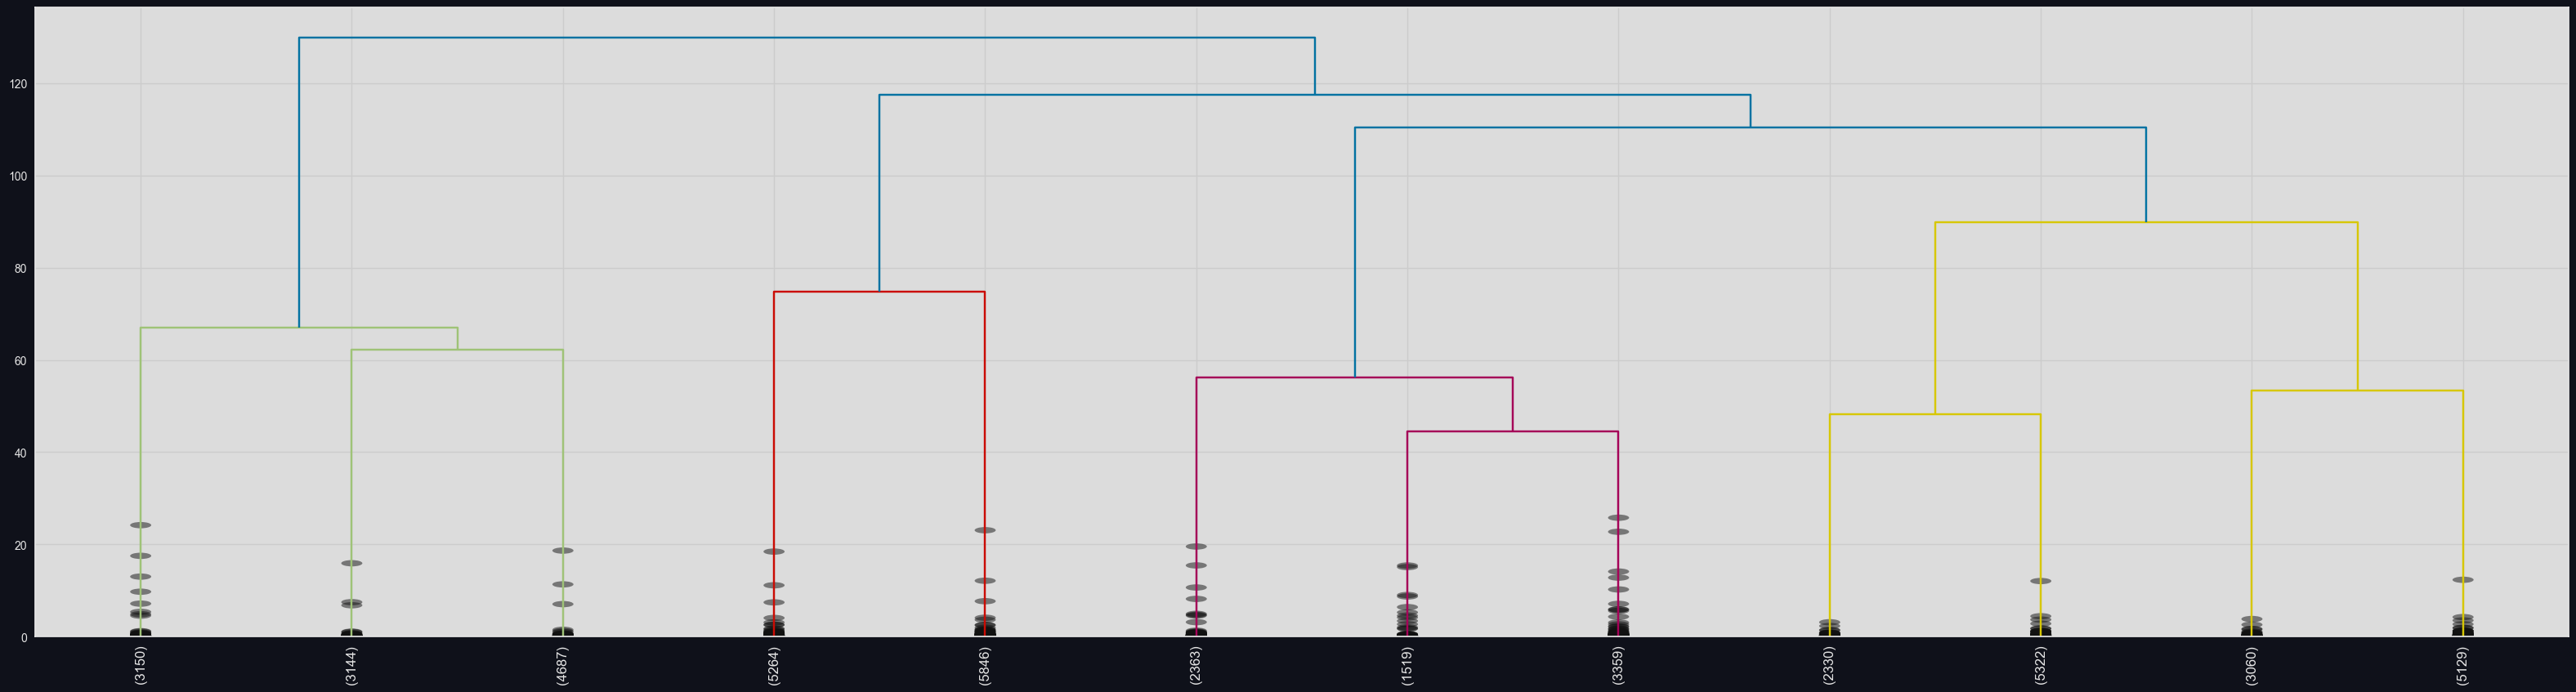

In [7]:
dend, ax = plt.subplots(1, 1, figsize=(40, 10))
dn = dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
    ax = ax
)

In [8]:
# dend.savefig('img/heirplot/dendrogram.png', bbox_inches='tight')

In [9]:
print('Distance of Last 8 Clusters from linkage array: ')
print(Z[-8:, 2].reshape(8,1))
print('Distance between last 8 Clusters: ')
print(Z[-8:, 2].reshape(8,1) - Z[-9:-1, 2].reshape(8,1))

Distance of Last 8 Clusters from linkage array: 
[[ 56.2506079 ]
 [ 62.25032627]
 [ 67.07444148]
 [ 74.74520694]
 [ 89.77347072]
 [110.41179567]
 [117.41185079]
 [129.89581609]]
Distance between last 8 Clusters: 
[[ 2.85000042]
 [ 5.99971837]
 [ 4.82411521]
 [ 7.67076546]
 [15.02826378]
 [20.63832495]
 [ 7.00005512]
 [12.4839653 ]]


#### **Determining Number of Clusters**

As we can see from above, the point where the distance between clusters is the most obvious is from {74 to 89} (15.03) and from {89 to 110} (20.64).
Since {89 to 110} has a bigger distance between clusters, we will say that our cut-off is at around 100 for better visualization.

In [10]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

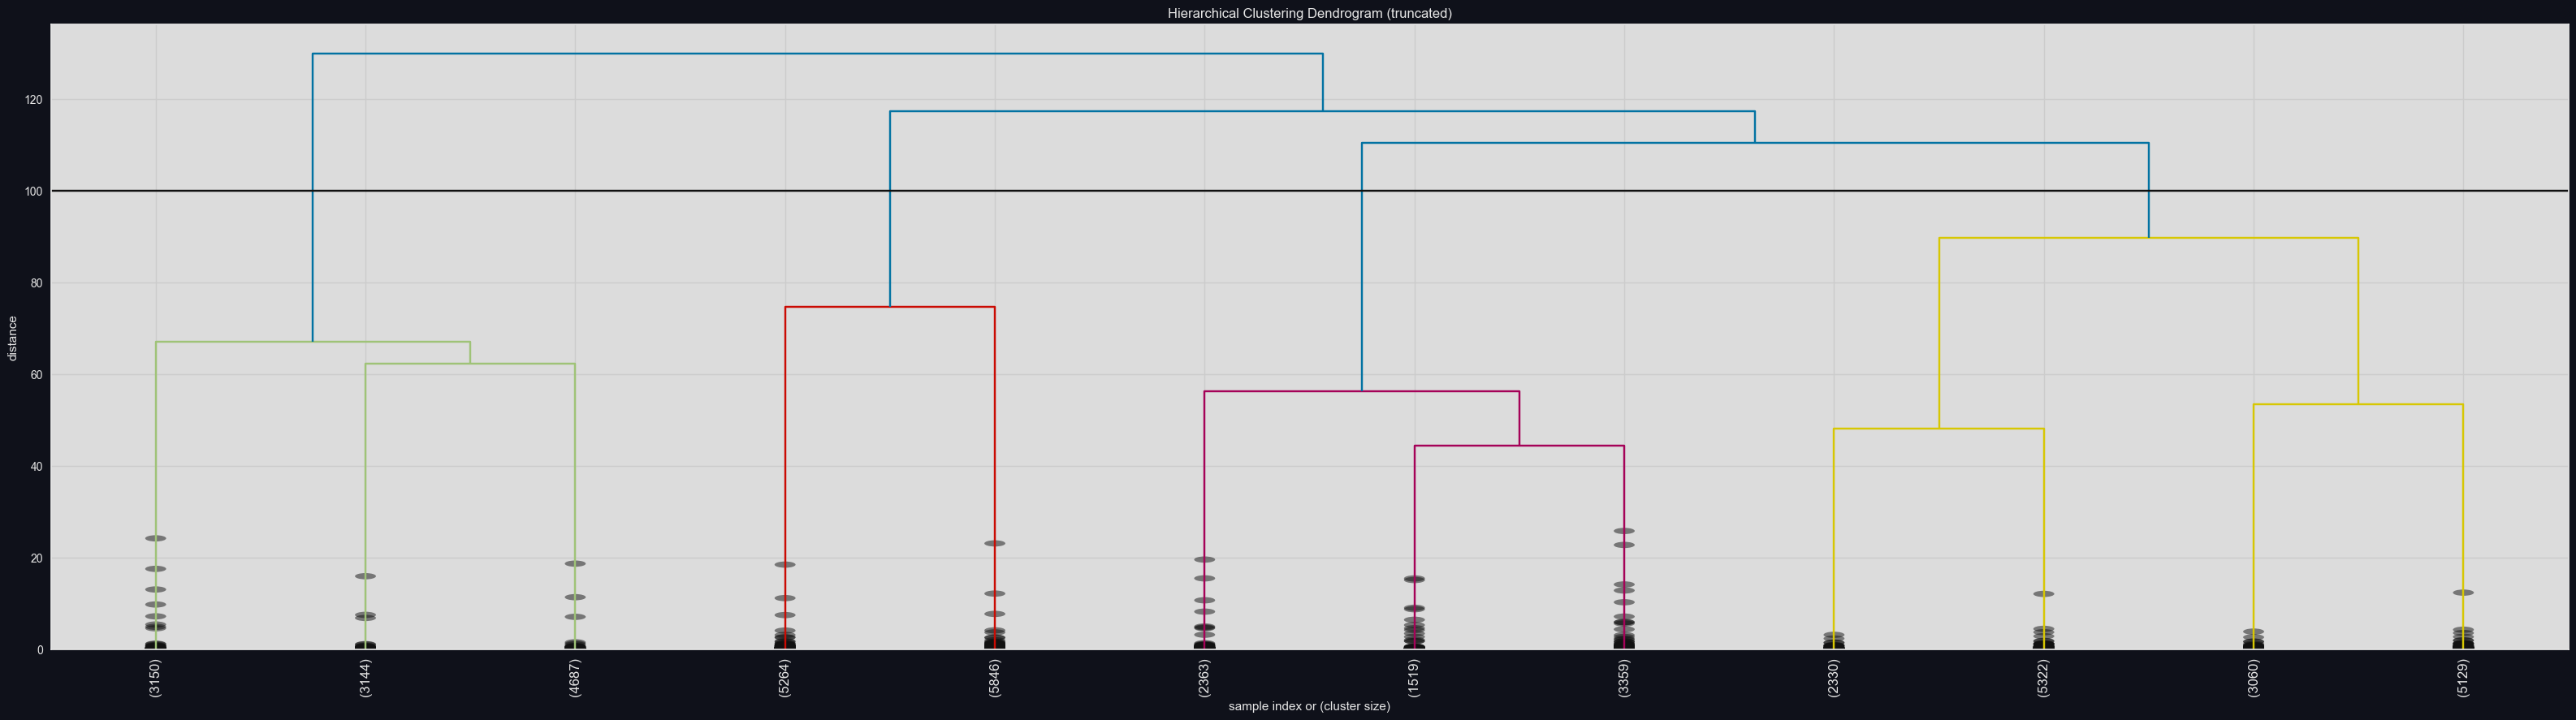

In [11]:
fdend, ax = plt.subplots(1, 1, figsize=(40, 10))
max_d = 100
fdn = fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1000,  # useful in small plots so annotations don't overlap
    max_d=max_d,
    ax=ax
    )

In [13]:
dend.savefig('img/hierplot/dendrogram.png', bbox_inches='tight')
fdend.savefig('img/hierplot/fancy_dendrogram.png', bbox_inches='tight')

#### **Retrieving Clusters**

Now that we know the cut-off, we will be using the function "fcluster".

In [14]:
max_d = 100
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 3, ..., 4, 4, 4], dtype=int32)

In [17]:
dfV['Cluster'] = clusters
dfV.to_csv('dfHierClusters.csv', index=False)
dfV.head()

,age,balance,day,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y,Cluster
0,58,2143,5,1,0,0,2,1,2,0,1,0,0,4,0,0,1
1,44,29,5,1,0,0,1,0,1,0,1,0,0,4,0,0,1
2,33,2,5,1,0,0,2,1,1,0,1,1,0,4,0,0,3
3,47,1506,5,1,0,0,0,1,0,0,1,0,0,4,0,0,1
4,33,1,5,1,0,0,0,0,0,0,0,0,0,4,0,0,1


In [18]:
def clusterVisualize(df, component1, component2 ,imgName=None):
    dfV = df.copy()
    fig, axd = plt.subplot_mosaic([[0,0],[1,2]], constrained_layout=True, figsize=(14,8))
    fig.suptitle(f'{component1} vs {component2}', weight='bold', fontsize=16)

    sns.scatterplot(data=dfV, x=component1, y=component2, hue='Cluster', palette='copper_r', ax=axd[0])
    sns.violinplot(data=dfV, x='Cluster', y=component2, palette='copper_r', ax=axd[1])
    sns.violinplot(data=dfV, x='Cluster', y=component1, palette='copper_r', ax=axd[2])
    if imgName != None:
        fig.savefig("img/"+imgName+".png")

In [21]:
cateCol = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numCol = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
with open ('checkGroupbyCluster_cate_hier.txt', 'w') as f:
    for col in cateCol:
        f.write(str(dfV[col].groupby(dfV['Cluster']).value_counts())+'\n')
        f.write('='*50 + '\n')

In [ ]:
for col in numCol:
    for col2 in numCol:
        if(col != col2):
            clusterVisualize(dfV, col, col2, f'hierplot/numvsnum/{col}_vs_{col2}')

In [ ]:
for col in cateCol:
    for col2 in cateCol:
        if(col != col2):
            clusterVisualize(dfV, col, col2, f'hierplot/catevscate/{col}_vs_{col2}')

In [ ]:
for col in numCol:
    for col2 in cateCol:
        clusterVisualize(dfV, col, col2, f'hierplot/numvscate/{col}_vs_{col2}')

In [ ]:
figToSave = []
fileName = []
for fig in figToSave:
    fig.savefig('img/'+fileName+'.png')

#### **Model 4: Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**

In [ ]:
df = pd.read_csv('df.csv')